## Cleaning the UK breach dataset (2016-2022)

### Important libraries must be installed in the conda envrionment used, libraries installed in this environment
### inlcude the following: 

1. Pandas
2. Matplotlib
3. Openpyxl(To be able to read the excel file)
4. Scipy
5. Pyreadstats
6. statstmodel
7. Prophet
8. ARIMA


**These models can be installed using the pip command or the conda command** </b>

<b>  "pip install seaborn scipy scikit-learn pyreadstat" 
</b>

<b>  **"conda install -c conda-forge seaborn scipy scikit-learn pyreadstat"**</b>



In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime




In [2]:
# Read file in excel, then save to csv, this can be done by simply saving the file ..

# Read file from directory where file is saved on your machine...

#Uk_breaches=pd.read_excel("/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/combined_2016-2022.xlsx")
#Uk_breaches.to_csv('uk_breaches.csv', index = False)



In [3]:
# read saved csv file to a dataframe
uk_df = pd.read_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_breaches.csv')
uk_df.head()

/var/folders/y3/5_ydnp0s5ddfxtfqygnzxwx00000gp/T/ipykernel_18414/3910582014.py:2: DtypeWarning: Columns (1,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,280,281,282,298,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,384,385,386,387,388,389,390,391,392,393,407,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,45

,uniqser,IMID2,samptype,questtype,income,income2,country,region_comb,sector_comb2,title1,...,gdprwhat26,gdprwhat27,gdprwhat28,gdprwhat29,gdprwhat30,gdprwhat31,gdprwhat32,gdprwhat33,year,weight
0,1,90160,IDBR sample,Private Sector,-1,-1,-1,South of England,NaN,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,2016,2.4668
1,2,90390,IDBR sample,Private Sector,-1,-1,-1,North of England,NaN,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,2016,0.0183
2,3,90174,IDBR sample,Private Sector,-1,-1,-1,North of England,NaN,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,2016,0.0066
3,4,90155,IDBR sample,Private Sector,-1,-1,-1,Scotland,NaN,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,2016,0.0293
4,5,90264,IDBR sample,Private Sector,-1,-1,-1,Scotland,NaN,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,2016,0.0299


In [4]:
# Check data types of all columns in the DataFrame
data_types = uk_df.dtypes

print(data_types)


uniqser         int64
IMID2          object
samptype       object
questtype      object
income         object
               ...   
gdprwhat31     object
gdprwhat32     object
gdprwhat33     object
year            int64
weight        float64
Length: 714, dtype: object


In [5]:
# extract a list of columns
column_names = uk_df.columns.tolist()

print(column_names)


['uniqser', 'IMID2', 'samptype', 'questtype', 'income', 'income2', 'country', 'region_comb', 'sector_comb2', 'title1', 'title2', 'title3', 'title4', 'title5', 'title6', 'title7', 'title8', 'title9', 'title10', 'title11', 'title12', 'title13', 'title14', 'title15', 'title16', 'title17', 'title18', 'title19', 'typex', 'sizea', 'sizeb', 'online1', 'online2', 'online3', 'online4', 'online5', 'online6', 'online7', 'online8', 'online9', 'online10', 'online11', 'online12', 'online13', 'mobile', 'investb', 'investd', 'investf', 'ita', 'charityo', 'core', 'covpri', 'priority', 'priority_2', 'priority_3', 'outsource', 'attitude_1', 'attitude_2', 'attitude_3', 'attitude_4', 'investa', 'investc_s', 'investc_m', 'investc_l', 'investe', 'investg', 'itb_s', 'itb_m', 'itb_l', 'reason1', 'reason2', 'reason3', 'reason4', 'reason5', 'reason6', 'reason7', 'reason8', 'reason9', 'reason10', 'reason11', 'reason12', 'reason13', 'reason14', 'reason15', 'reason16', 'reason17', 'reason18', 'reason19', 'reason20'

##  Extract relevant columns from  the Dataframe

In [6]:
# Extract relevant columns containing relevant information

# List of column names to extract

columns_to_extract = ['type' + str(i) for i in range(1, 16)] + ['year']

# Extract the columns

extracted_df = uk_df[columns_to_extract]

# Print the first few rows of the extracted DataFrame

#print(extracted_df.head())

extracted_df.head()


,type1,type2,type3,type4,type5,type6,type7,type8,type9,type10,type11,type12,type13,type14,type15,year
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2016
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2016
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2016
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2016
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2016


## Feature extraction
#### Extracting attack types from dataset.

In [7]:
# dataframe
extracted_df.tail(10)

,type1,type2,type3,type4,type5,type6,type7,type8,type9,type10,type11,type12,type13,type14,type15,year
12440,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2022
12441,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12442,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12443,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12444,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12445,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12446,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,People impersonating your organisation in emai...,Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised 

In [8]:
# get the rows in specific columns to see what information is held within the column

type9_data = extracted_df['type9']

# Print the column data
#print(type7_data)

type9_data_list = type9_data.tolist()

print(type9_data_list)

['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1

In [9]:
# Rename columns based on the attack types..
# Rename columns based on response that is from type10-type13
# Rename columns of a DataFrame
# eavesdropping is named 'Man in the middle attack'
#column type13 is a duplicate of type9 column, so not renamed and will be dropped  

extracted_df = extracted_df.rename(columns={'type1': 'Ransomware', 'type2': 'Malware','type3': 'DDos','type4': 'Hacking',
                                         'type5': 'Domain_spoofing','type6': 'Phishing','type7': 'Unauthorised_access_staff','type8': 'Unauthorised_access_external',
                                          'type9': 'Other', 'type10': "Don't_know",'type11':'None_of_these','type12':'Refused',
                                         'type14':'Unauthorised_access_students','type15':'MitM', 'year':'Year'})



extracted_df.tail(10) 


,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Unauthorised_access_staff,Unauthorised_access_external,Other,Don't_know,None_of_these,Refused,type13,Unauthorised_access_students,MitM,Year
12440,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2022
12441,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12442,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12443,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12444,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12445,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,-1,no Unauthorised listening into video conferenc...,2022
12446,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,People impersonating your organisation in emai...,Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types o

## In the survey of data breaches carried out -1 can represent any of the following:

1. **No response**
2. **Not Applicable**
3. **Data Error**

To deal with this, drop all -1 from the data.

In [10]:
# Convert "-1" strings to NaN
uk_cleaned = extracted_df.replace("-1", pd.NA)

# Display the first few rows of the cleaned data#

print(uk_cleaned)


                                           Ransomware  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
12445  no Computers becoming infected with ransomware   
12446  no Computers becoming infected with ransomware   
12447  no Computers becoming infected with ransomware   
12448  no Computers becoming infected with ransomware   
12449  no Computers becoming infected with ransomware   

                                                 Malware  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4              

In [11]:

# Drop the rows with any NA values

uk_data = uk_cleaned.dropna()

# Display the first few rows of the cleaned data

uk_data.head()


,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Unauthorised_access_staff,Unauthorised_access_external,Other,Don't_know,None_of_these,Refused,type13,Unauthorised_access_students,MitM,Year
1007,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1008,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1009,Computers becoming infected with ransomware,Computers becoming infected with other malware...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,People impersonating your organisation in emai...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1010,no Computers becoming infected with ransomware,Computers becoming infected with other malware...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1011,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Any other types of cyber security breaches ...,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017


In [12]:
# Need to drop column type13 as it is a duplicate of column 9

# Drop column 'type13'
uk_data = uk_data.drop(columns=['type13'])

# Display the first few rows of the cleaned data
uk_data.head()


,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Unauthorised_access_staff,Unauthorised_access_external,Other,Don't_know,None_of_these,Refused,Unauthorised_access_students,MitM,Year
1007,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1008,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1009,Computers becoming infected with ransomware,Computers becoming infected with other malware...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,People impersonating your organisation in emai...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1010,no Computers becoming infected with ransomware,Computers becoming infected with other malware...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,no None of these,no Refused,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017
1011,no Computers becoming infected with ransomware,no Computers becoming infected with other malw...,no Denial of service attacks,no Hacking or attempted hacking of online bank...,no People impersonating your organisation in e...,no Phishing attacks,no Unauthorised accessing of files or networks...,no Unauthorised accessing of files or network ...,no Any other types of cyber security breaches ...,no Don't know,None of these,no Refused,no Unauthorised accessing of files or networks...,no Unauthorised listening into video conferenc...,2017



### Now the data has been cleaned to an extent, it is time to count the frequency of the

### attacks the txt data in the columns will be transformed to integer to be able to perform

### some statiscal analysis.

In [13]:
# Apply the mapping to each column
for column in uk_data.columns:
    # Only apply to string columns
    if uk_data[column].dtype == 'object': 
        
        uk_data[column] = uk_data[column].apply(lambda x: 0 if isinstance(x, str) and 'no' in x else 1)

uk_data.head()



,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Unauthorised_access_staff,Unauthorised_access_external,Other,Don't_know,None_of_these,Refused,Unauthorised_access_students,MitM,Year
1007,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2017
1008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2017
1009,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2017
1010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2017
1011,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2017


In [14]:
# set index to year and perform a total count and push to a new dataframe

uk_data.set_index('Year', inplace=True)

print(uk_data)


      Ransomware  Malware  DDos  Hacking  Domain_spoofing  Phishing  \
Year                                                                  
2017           0        0     0        0                0         0   
2017           0        0     0        0                0         0   
2017           1        1     0        0                1         0   
2017           0        1     0        0                0         0   
2017           0        0     0        0                0         0   
...          ...      ...   ...      ...              ...       ...   
2022           0        0     0        0                0         1   
2022           0        0     0        0                0         0   
2022           0        0     0        0                1         1   
2022           0        0     0        0                0         1   
2022           0        0     0        0                1         1   

      Unauthorised_access_staff  Unauthorised_access_external  Other  \
Year

### The data above shows there were no responses given about cyber incidents in 2016, Why is this? 


### From the raw data it is obvious that there were some responses from organisations to other questions but 

### not to questions regarding  cyber incidents.
 
<b>  **Two columns will be dropped the refused and don't know columns as this represent zero responses to attacks** </b>

In [15]:
# Drop the 'Refused'  and 'Dont know' columns
uk_cyber_incidents = uk_data.drop(columns=["Refused", "Don't_know"])

uk_cyber_incidents

,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Unauthorised_access_staff,Unauthorised_access_external,Other,None_of_these,Unauthorised_access_students,MitM
Year,,,,,,,,,,,,
2017,0,0,0,0,0,0,0,0,0,1,0,0
2017,0,0,0,0,0,0,0,0,0,1,0,0
2017,1,1,0,0,1,0,0,0,0,0,0,0
2017,0,1,0,0,0,0,0,0,0,0,0,0
2017,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022,0,0,0,0,0,1,0,0,0,0,0,0
2022,0,0,0,0,0,0,0,0,0,1,0,0
2022,0,0,0,0,1,1,0,0,0,0,0,0


In [16]:
# Create a new dataframe with the total count of each column for each year

uk_cyber_incidents_yearly = uk_cyber_incidents.groupby(level=0).sum()

uk_cyber_incidents_yearly


,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Unauthorised_access_staff,Unauthorised_access_external,Other,None_of_these,Unauthorised_access_students,MitM
Year,,,,,,,,,,,,
2017,181,299,79,54,309,589,59,84,46,716,0,0
2018,165,303,132,64,414,787,93,124,53,1069,0,0
2019,57,98,50,34,160,349,27,52,23,590,1024,0
2020,11,36,23,8,45,117,15,9,11,84,26,0
2021,4,18,18,5,44,89,7,6,10,159,8,4
2022,18,58,49,19,136,266,32,16,24,181,31,26


In [17]:
# to transpose the data to see what is going on...('This format will not be used for time-series analysis')
# Transpose the dataframe

uk_cyber_incidents_yearly_transposed = uk_cyber_incidents_yearly.transpose()

uk_cyber_incidents_yearly_transposed


Year,2017,2018,2019,2020,2021,2022
Ransomware,181,165,57,11,4,18
Malware,299,303,98,36,18,58
DDos,79,132,50,23,18,49
Hacking,54,64,34,8,5,19
Domain_spoofing,309,414,160,45,44,136
Phishing,589,787,349,117,89,266
Unauthorised_access_staff,59,93,27,15,7,32
Unauthorised_access_external,84,124,52,9,6,16
Other,46,53,23,11,10,24
None_of_these,716,1069,590,84,159,181


In [18]:
# merge, rename and drop individual columns that have been merged

# Merge all columns starting with 'Unauthorised'

unauthorised_cols = [col for col in uk_cyber_incidents_yearly.columns if col.startswith('Unauthorised')]

uk_cyber_incidents_yearly['Unauthorised_access'] = uk_cyber_incidents_yearly[unauthorised_cols].sum(axis=1)

# Merge 'None_of_these' and 'Other'

uk_cyber_incidents_yearly['Other'] = uk_cyber_incidents_yearly[['None_of_these', 'Other']].sum(axis=1)

# Drop the individual columns

uk_cyber_incidents_yearly = uk_cyber_incidents_yearly.drop(columns=unauthorised_cols + ['None_of_these'])

uk_cyber_incidents_yearly


,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Other,MitM,Unauthorised_access
Year,,,,,,,,,
2017,181,299,79,54,309,589,762,0,143
2018,165,303,132,64,414,787,1122,0,217
2019,57,98,50,34,160,349,613,0,1103
2020,11,36,23,8,45,117,95,0,50
2021,4,18,18,5,44,89,169,4,21
2022,18,58,49,19,136,266,205,26,79


In [19]:
#saving the data to dataset folder

#comment this out as this was saved to my own directory

#uk_cyber_incidents_yearly.to_csv(r"/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_cyber_incidents_yearly.csv")


## Converting Data to a Univarite Time-Series ready for Analysis

### Data Transformation and Normalisation.  

###  Convert Year to Month.  

### Distribute number of Attacks to the Months created
                                              
                                        


In [20]:
# Reload saved data and transform to monthly times series data

uk_time_series = pd.read_csv("/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_cyber_incidents_yearly.csv")
uk_time_series.head()

,Year,Ransomware,Malware,DDos,Hacking,Domain_spoofing,Phishing,Other,MitM,Unauthorised_access
0,2017,181,299,79,54,309,589,762,0,143
1,2018,165,303,132,64,414,787,1122,0,217
2,2019,57,98,50,34,160,349,613,0,1103
3,2020,11,36,23,8,45,117,95,0,50
4,2021,4,18,18,5,44,89,169,4,21


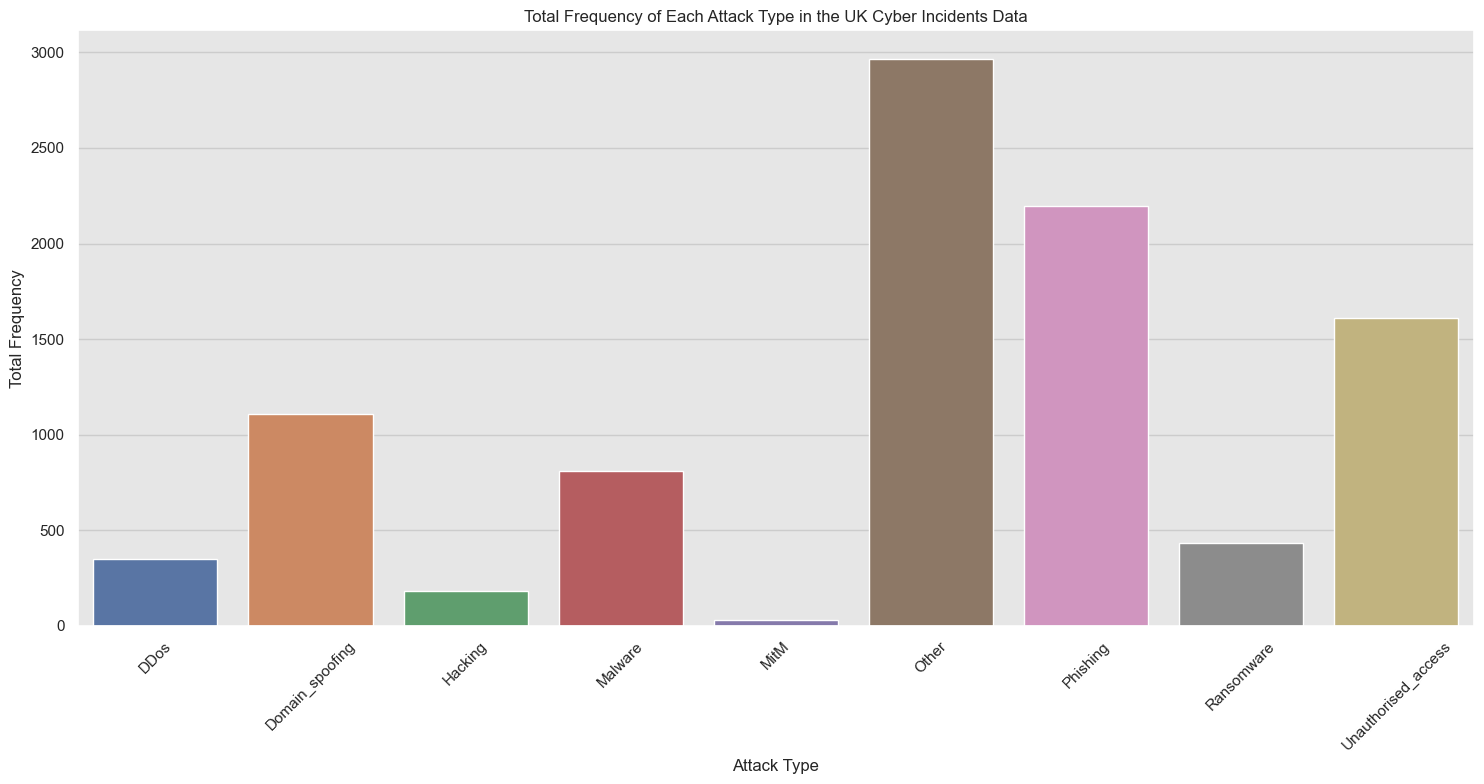

In [21]:



# Melting the DataFrame to have 'Year', 'Type_of_Attack', and 'Frequency' as columns

uk_time_series_melted = uk_time_series.melt(id_vars='Year', var_name='Type_of_Attack', value_name='Frequency')

# Calculate the total frequency for each type of attack

total_frequency_uk = uk_time_series_melted.groupby('Type_of_Attack')['Frequency'].sum().reset_index()

# Create a bar chart to show the total frequency of each attack type in the UK
sns.set(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
plt.figure(figsize=(15, 8))
sns.barplot(data=total_frequency_uk, x='Type_of_Attack', y='Frequency')
plt.title('Total Frequency of Each Attack Type in the UK Cyber Incidents Data')
plt.xlabel('Attack Type')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility
plt.tight_layout()
plt.show()


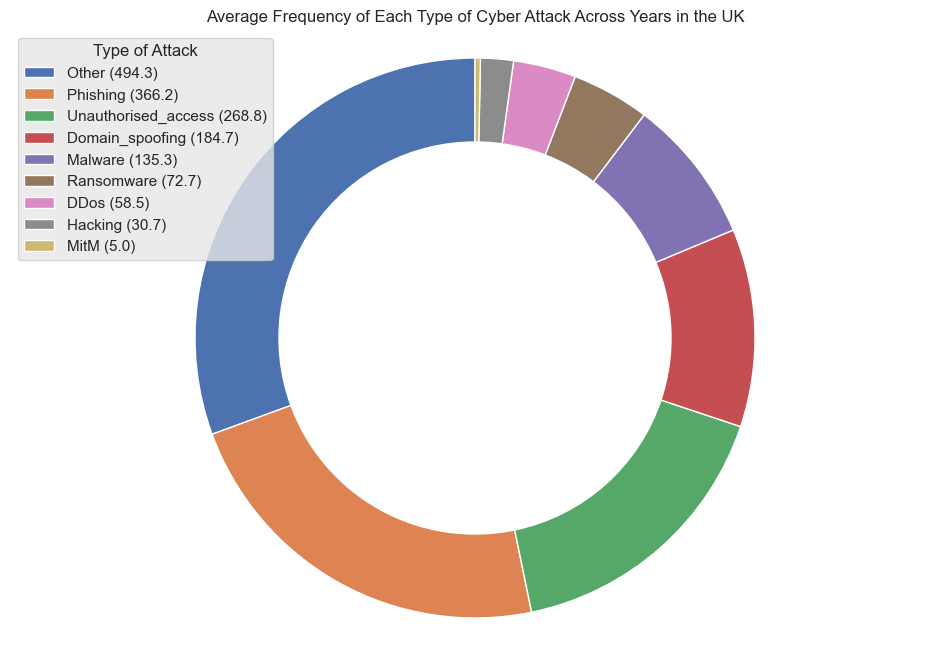

In [22]:
# Create a pie chart with spaced-out labels for better readability

# Calculate the average frequency for each type of attack across all years

average_frequency = uk_time_series_melted.groupby('Type_of_Attack')['Frequency'].mean().reset_index()

# Sort the data by frequency to make the pie chart more readable
average_frequency = average_frequency.sort_values('Frequency', ascending=False)


plt.figure(figsize=(12, 8))

plt.pie(average_frequency['Frequency'], labels=None, autopct=None, startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding legend to space out the labels
plt.legend(title='Type of Attack', labels=[f"{row['Type_of_Attack']} ({row['Frequency']:.1f})" for _, row in average_frequency.iterrows()], loc="best")

# Add title
plt.title('Average Frequency of Each Type of Cyber Attack Across Years in the UK')

# Display the pie chart
plt.show()


### The pie chart above shows a pie chart, showing the frequency distribution of attack types over the years. <br>
### Phishing from the plot above seems have the highest frequency of known attack types.

In [23]:
# Summing up all attacks in each year and creating a new DataFrame called uk_breaches
uk_incidents = uk_time_series.copy()
uk_incidents['no_of_attacks'] = uk_incidents.iloc[:, 1:].sum(axis=1)

# Keeping only the 'Year' and 'no_of_attacks' columns
uk_incidents = uk_incidents[['Year', 'no_of_attacks']]

uk_incidents.head()


,Year,no_of_attacks
0,2017,2416
1,2018,3204
2,2019,2464
3,2020,385
4,2021,372


In [24]:
# save the dataset
#uk_incidents.to_csv('/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_incidents.csv', index=False)


# Exploratory analysis of UK cyber incident data.  


In [25]:
# check variable type and convert where neccessary
uk_incidents.dtypes

Year             int64
no_of_attacks    int64
dtype: object

In [26]:
# year to datetime stamp..

# Converting the 'Year' column to a datetime format with only the year information

uk_incidents['Year'] = pd.to_datetime(uk_incidents['Year'], format='%Y').dt.to_period('Y')
# check type again..
uk_incidents.dtypes

Year             period[A-DEC]
no_of_attacks            int64
dtype: object

In [27]:
# check info..
uk_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   Year           6 non-null      period[A-DEC]
 1   no_of_attacks  6 non-null      int64        
dtypes: int64(1), period[A-DEC](1)
memory usage: 224.0 bytes


In [28]:
# descriptive statistics
uk_incidents.describe()

,no_of_attacks
count,6.000000
mean,1616.166667
std,1226.486432
min,372.000000
25%,502.750000
50%,1636.000000
75%,2452.000000
max,3204.000000


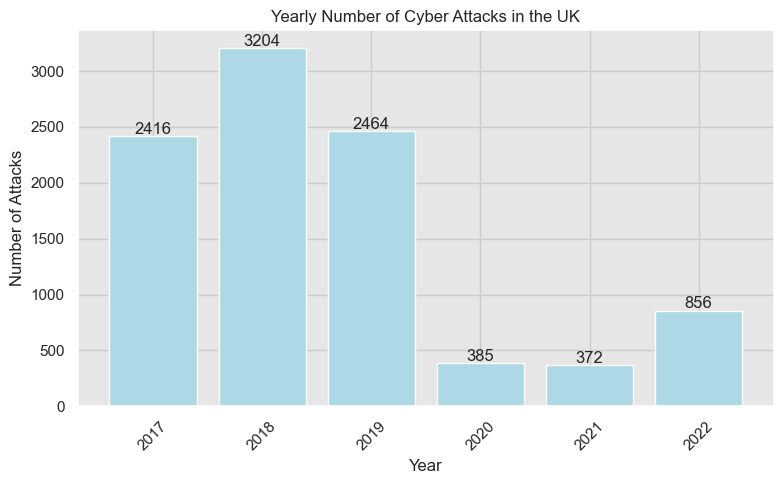

In [29]:
# Plot time uk data


plt.figure(figsize=(8, 5))
plt.bar(uk_incidents['Year'].astype(str), uk_incidents['no_of_attacks'], color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Yearly Number of Cyber Attacks in the UK')
plt.xticks(rotation=45)

# Annotating the bars
for i, v in enumerate(uk_incidents['no_of_attacks']):
    plt.text(i, v + 20, str(v), ha='center')

plt.tight_layout()
plt.show()


## Line graph showing data points and yearly trend of attacks.

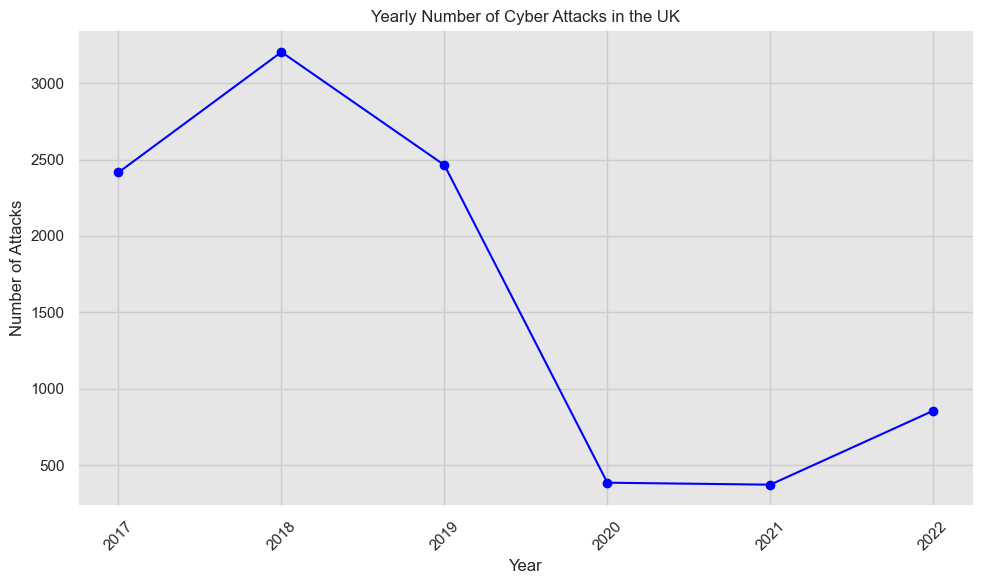

In [30]:

# Keeping only the 'Year' and 'no_of_attacks' columns
uk_incidents = uk_incidents[['Year', 'no_of_attacks']]

# Convert the 'Year' column back to datetime format suitable for plotting
uk_incidents['Year'] = uk_incidents['Year'].dt.to_timestamp()

# Plotting the initial data set as a line graph with soft pink color
plt.figure(figsize=(10, 6))
plt.plot(uk_incidents['Year'].dt.strftime('%Y'), uk_incidents['no_of_attacks'], color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Yearly Number of Cyber Attacks in the UK')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


### The UK yearly data will be upsampled to monthly frequencies


In [31]:

# Convert the 'Year' column to a datetime format
uk_incidents['Year'] = pd.to_datetime(uk_incidents['Year'], format='%Y')

# Display the first few rows of the dataset after the conversion
uk_incidents.head()



,Year,no_of_attacks
0,2017-01-01,2416
1,2018-01-01,3204
2,2019-01-01,2464
3,2020-01-01,385
4,2021-01-01,372


### Upsampling using the python function resample ( ), forward fill to start from January.

In [32]:
# Reset the index of the original dataset
uk_incidents.reset_index(inplace=True)

# Set the index to the 'Year' column again
uk_incidents.set_index('Year', inplace=True)

# Upsample the data to a monthly frequency and assign the yearly value to January
uk_incidents_resampled = uk_incidents.resample('M').ffill()

# Display the last few rows of the corrected resampled dataset
uk_incidents_resampled.tail(15)


,index,no_of_attacks
Year,,
2020-11-30,3,385
2020-12-31,3,385
2021-01-31,4,372
2021-02-28,4,372
2021-03-31,4,372
2021-04-30,4,372
2021-05-31,4,372
2021-06-30,4,372
2021-07-31,4,372


In [33]:
# Drop the index column added during resampling
# Drop the unnecessary 'index' column if it exists
if "index" in uk_incidents_resampled.columns:
    uk_incidents_resampled.drop(columns=["index"], inplace=True)

# Display the tail of the dataset to confirm
uk_incidents_resampled.head(15)


,no_of_attacks
Year,
2017-01-31,2416
2017-02-28,2416
2017-03-31,2416
2017-04-30,2416
2017-05-31,2416
2017-06-30,2416
2017-07-31,2416
2017-08-31,2416
2017-09-30,2416


## Plot the UK resampled data

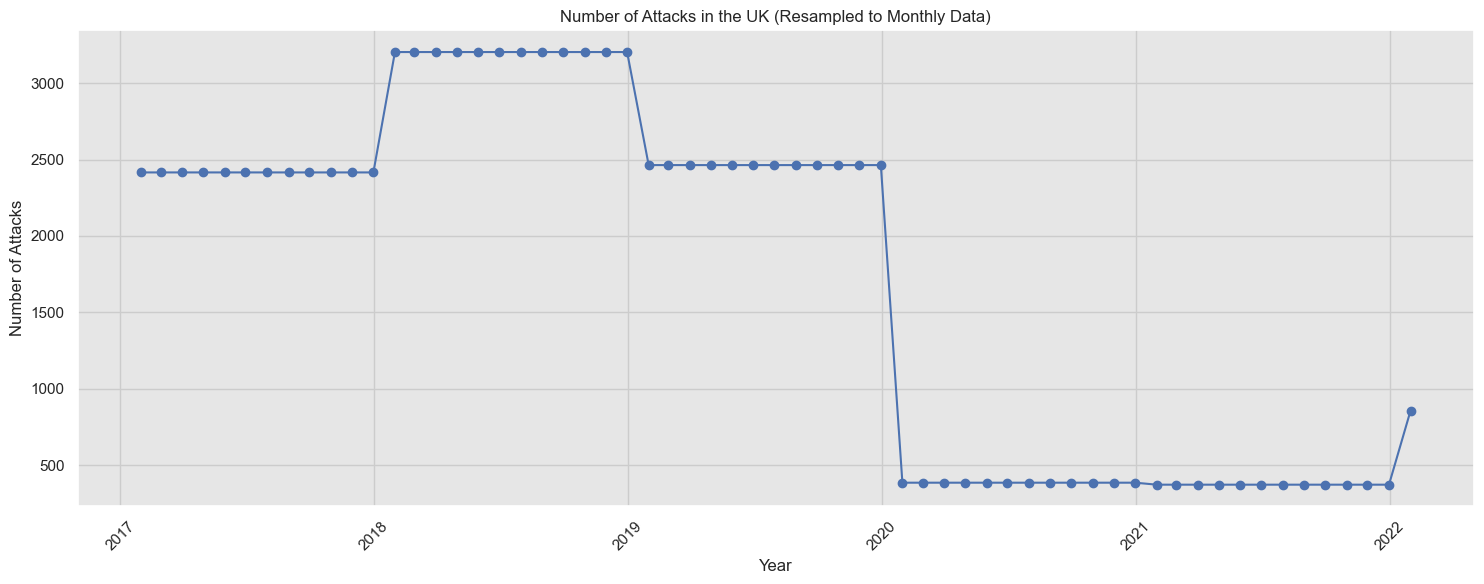

In [34]:
# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(uk_incidents_resampled.index, uk_incidents_resampled['no_of_attacks'], marker='o', linestyle='-')
plt.title('Number of Attacks in the UK (Resampled to Monthly Data)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




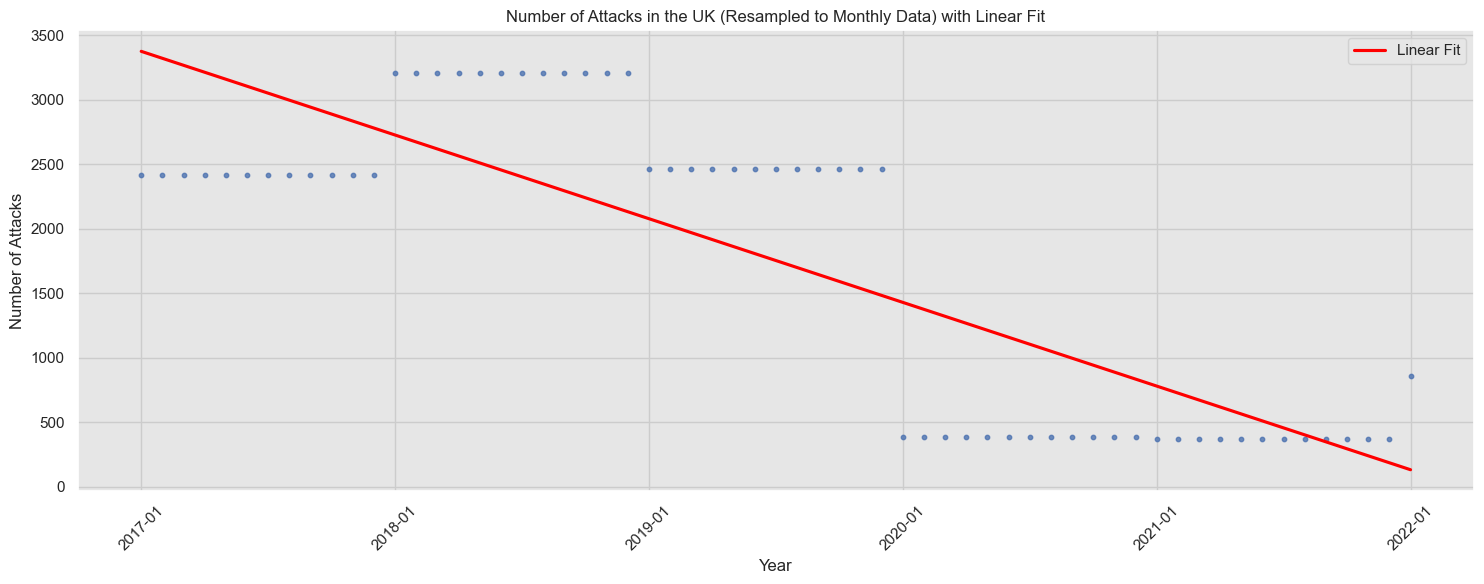

(-54.04410364886306, 3374.5690111052363)

In [35]:
import seaborn as sns
from scipy.stats import linregress

# Convert index to integer for regression
x_values = np.array(range(len(uk_incidents_resampled)))

# Create the plot using seaborn and matplotlib
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data points and linear fit using seaborn's regplot
sns.regplot(x=x_values, y='no_of_attacks', data=uk_incidents_resampled, 
            line_kws={"color": "red", "label": "Linear Fit"}, ci=None, ax=ax, scatter_kws={'s': 10})

# Title and labels
ax.set_title('Number of Attacks in the UK (Resampled to Monthly Data) with Linear Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')

# Rotate x-axis labels for better visibility and set them to spaced-out unique values in the 'Year' column
unique_dates = uk_incidents_resampled.index.strftime('%Y-%m').unique()
spaced_dates = unique_dates[::12]  # Select every 12th date for a less cluttered x-axis

ax.set_xticks(range(0, len(uk_incidents_resampled), 12))
ax.set_xticklabels(spaced_dates, rotation=45)

# Add grid and legend
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

# Calculate the slope and intercept using scipy's linregress function
slope, intercept, _, _, _ = linregress(x_values, uk_incidents_resampled['no_of_attacks'])
slope, intercept


### Linear Regression Analysis <br>  

<font size = '3.0'>
The linear regression equation for the number of attacks over time is given by: y = −54.04x + 3374.57

Where:y is the estimated number of attacks. x is the time index (0 for the first month, 1 for the second month, and so on).
This means that, on average, the number of attacks is decreasing by approximately 54.04 units per month from an initial value of 3374.57.
</font>


### Checking for outliers

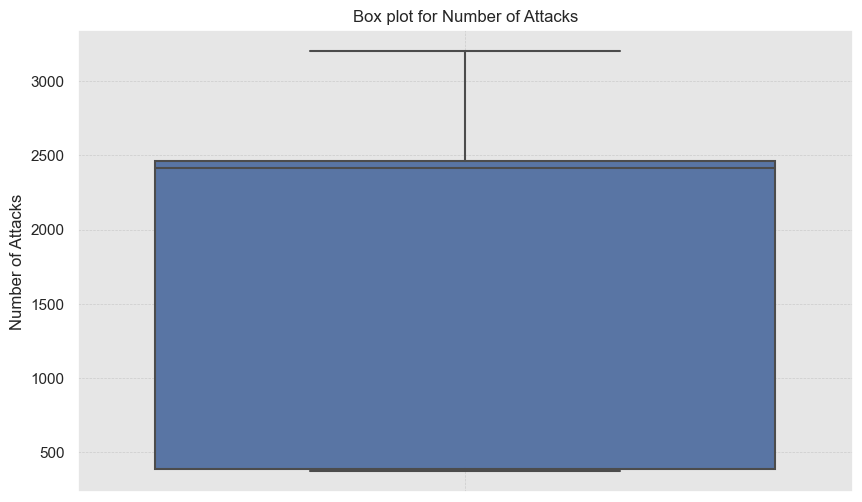

In [36]:
# check for outliers
# Create a box plot for the 'no_of_attacks' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=uk_incidents_resampled['no_of_attacks'])
plt.title('Box plot for Number of Attacks')
plt.ylabel('Number of Attacks')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [37]:
# Using z scores to also check for outliers...
from scipy.stats import zscore

# Calculate z-scores for 'no_of_attacks' column
z_scores = zscore(uk_incidents_resampled['no_of_attacks'])

# Define a threshold for outliers (e.g., |Z| > 3)
threshold = 3
outliers = uk_incidents_resampled[np.abs(z_scores) > threshold]

outliers


,no_of_attacks
Year,


<font size = '4.0' >
No outliers detected.
</font>

In [38]:

# Save the uk_incidents_resampled dataset to a CSV file
#save_path_uk = "/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_incidents_resampled.csv"

#uk_incidents_resampled.to_csv(save_path_uk)

#save_path_uk


'/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_incidents_resampled.csv'

## Data was sourced from UK data service:
**Reference : Department for Digital, Culture, Media and Sport. (2022). Cyber Security Breaches Survey: Combined Dataset, 2016-2022. [data collection]. UK Data Service. SN: 8971, DOI: 10.5255/UKDA-SN-8971-1**



## This script is part of the author's research project, initial stage: Data Cleaning.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023



In [39]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
